## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [15]:
import os
import keras
import itertools
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## Batch vary

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256, 512, 1024]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=i, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f'batch_{str(i)}'
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 105s 2ms/step - loss: 2.2543 - accuracy: 0.1591 - val_loss: 22.5715 - val_accuracy: 0.1804
Epoch 46/50
50000/50000 [==============================] - 104s 2ms/step - loss: 2.2545 - accuracy: 0.1588 - val_loss: 12.2763 - val_accuracy: 0.1835
Epoch 47/50
50000/50000 [==============================] - 104s 2ms/step - loss: 2.2531 - accuracy: 0.1554 - val_loss: 3.6277 - val_accuracy: 0.1944
Epoch 48/50
50000/50000 [==============================] - 103s 2ms/step - loss: 2.2476 - accuracy: 0.1682 - val_loss: 56.3924 - val_accuracy: 0.2105
Epoch 49/50
50000/50000 [==============================] - 104s 2ms/step - loss: 2.2447 - accuracy: 0.1692 - val_loss: 20.2111 - val_accuracy: 0.1116
Epoch 50/50
50000/50000 [==============================] - 105s 2ms/step - loss: 2.2514 - accuracy: 0.1640 - val_loss: 98.1894 - val_accuracy: 0.2070
Model: "model_2"
_________________________________________________________________
Layer (type)                 O

Epoch 40/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.1509 - accuracy: 0.5923 - val_loss: 1.3725 - val_accuracy: 0.5167
Epoch 41/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.1425 - accuracy: 0.5955 - val_loss: 1.3578 - val_accuracy: 0.5232
Epoch 42/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.1422 - accuracy: 0.5960 - val_loss: 1.3531 - val_accuracy: 0.5297
Epoch 43/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.1397 - accuracy: 0.5949 - val_loss: 1.3481 - val_accuracy: 0.5280
Epoch 44/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.1293 - accuracy: 0.5993 - val_loss: 1.3088 - val_accuracy: 0.5414
Epoch 45/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.1263 - accuracy: 0.6025 - val_loss: 1.3463 - val_accuracy: 0.5257
Epoch 46/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.1180 - accuracy:

50000/50000 [==============================] - 7s 147us/step - loss: 0.9027 - accuracy: 0.6793 - val_loss: 1.4776 - val_accuracy: 0.5088
Epoch 36/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.8998 - accuracy: 0.6811 - val_loss: 1.4646 - val_accuracy: 0.5169
Epoch 37/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.8929 - accuracy: 0.6799 - val_loss: 1.5607 - val_accuracy: 0.4984
Epoch 38/50
50000/50000 [==============================] - 8s 151us/step - loss: 0.8941 - accuracy: 0.6810 - val_loss: 1.4887 - val_accuracy: 0.5033
Epoch 39/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.8816 - accuracy: 0.6872 - val_loss: 1.4396 - val_accuracy: 0.5186
Epoch 40/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.8707 - accuracy: 0.6894 - val_loss: 1.6091 - val_accuracy: 0.4855
Epoch 41/50
50000/50000 [==============================] - 8s 150us/step - loss: 0.8614 - accuracy: 0.6922 - val_loss:

50000/50000 [==============================] - 3s 54us/step - loss: 0.5128 - accuracy: 0.8225 - val_loss: 1.9785 - val_accuracy: 0.4623
Epoch 31/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.4948 - accuracy: 0.8298 - val_loss: 2.0076 - val_accuracy: 0.4634
Epoch 32/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.4783 - accuracy: 0.8335 - val_loss: 2.1372 - val_accuracy: 0.4534
Epoch 33/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.4730 - accuracy: 0.8359 - val_loss: 2.0957 - val_accuracy: 0.4515
Epoch 34/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.4579 - accuracy: 0.8394 - val_loss: 2.0291 - val_accuracy: 0.4677
Epoch 35/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.4388 - accuracy: 0.8480 - val_loss: 2.2840 - val_accuracy: 0.4555
Epoch 36/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.4268 - accuracy: 0.8512 - val_loss: 2.1635

50000/50000 [==============================] - 2s 39us/step - loss: 0.6175 - accuracy: 0.7932 - val_loss: 1.7332 - val_accuracy: 0.4797
Epoch 26/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.5853 - accuracy: 0.8059 - val_loss: 1.7884 - val_accuracy: 0.4715
Epoch 27/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.5643 - accuracy: 0.8122 - val_loss: 1.8198 - val_accuracy: 0.4642
Epoch 28/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.5446 - accuracy: 0.8197 - val_loss: 1.8074 - val_accuracy: 0.4744
Epoch 29/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.5165 - accuracy: 0.8292 - val_loss: 1.8358 - val_accuracy: 0.4670
Epoch 30/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.4897 - accuracy: 0.8405 - val_loss: 1.9306 - val_accuracy: 0.4525
Epoch 31/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.4643 - accuracy: 0.8487 - val_loss: 1.9437

50000/50000 [==============================] - 2s 32us/step - loss: 0.8796 - accuracy: 0.7034 - val_loss: 1.4680 - val_accuracy: 0.4954
Epoch 21/50
50000/50000 [==============================] - 2s 33us/step - loss: 0.8539 - accuracy: 0.7125 - val_loss: 1.4961 - val_accuracy: 0.4960
Epoch 22/50
50000/50000 [==============================] - 2s 33us/step - loss: 0.8244 - accuracy: 0.7263 - val_loss: 1.5104 - val_accuracy: 0.4978
Epoch 23/50
50000/50000 [==============================] - 2s 33us/step - loss: 0.7988 - accuracy: 0.7330 - val_loss: 1.5319 - val_accuracy: 0.4857
Epoch 24/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.7726 - accuracy: 0.7439 - val_loss: 1.5163 - val_accuracy: 0.4869
Epoch 25/50
50000/50000 [==============================] - 2s 33us/step - loss: 0.7448 - accuracy: 0.7546 - val_loss: 1.5715 - val_accuracy: 0.4872
Epoch 26/50
50000/50000 [==============================] - 2s 33us/step - loss: 0.7168 - accuracy: 0.7644 - val_loss: 1.5875

50000/50000 [==============================] - 1s 28us/step - loss: 1.1660 - accuracy: 0.5961 - val_loss: 1.4540 - val_accuracy: 0.4916
Epoch 16/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.1410 - accuracy: 0.6084 - val_loss: 1.4582 - val_accuracy: 0.4867
Epoch 17/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.1182 - accuracy: 0.6164 - val_loss: 1.4580 - val_accuracy: 0.4898
Epoch 18/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.0958 - accuracy: 0.6265 - val_loss: 1.4523 - val_accuracy: 0.4903
Epoch 19/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.0727 - accuracy: 0.6350 - val_loss: 1.4668 - val_accuracy: 0.4902
Epoch 20/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.0498 - accuracy: 0.6434 - val_loss: 1.4555 - val_accuracy: 0.4908
Epoch 21/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.0308 - accuracy: 0.6513 - val_loss: 1.4689

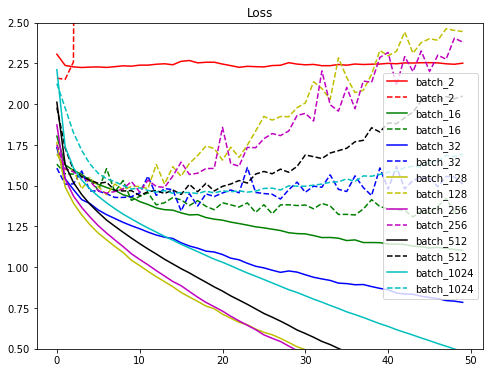

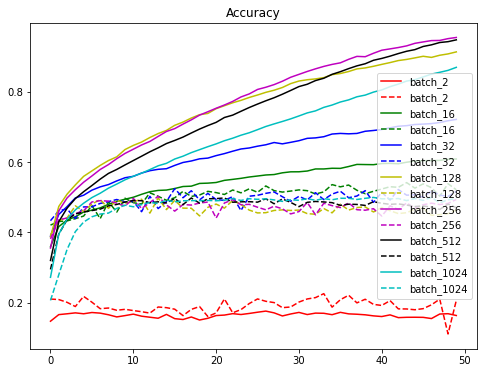

In [8]:
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0.5, 2.5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## BN before activation

In [11]:
BATCH_SIZE = [32, 128, 256, 1024]

In [30]:
def build_mlp_BNba(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [31]:
results_BNba = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in BATCH_SIZE:
    model = build_mlp_BNba(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=i, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f'batch_{str(i)}'
    results_BNba[exp_name_tag] = {'train-loss': train_loss,
                                  'valid-loss': valid_loss,
                                  'train-acc': train_acc,
                                  'valid-acc': valid_acc}

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_40 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_41 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                129

50000/50000 [==============================] - 6s 128us/step - loss: 0.7144 - accuracy: 0.7447 - val_loss: 1.6445 - val_accuracy: 0.5111
Epoch 48/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.7080 - accuracy: 0.7441 - val_loss: 1.7387 - val_accuracy: 0.5055
Epoch 49/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.7091 - accuracy: 0.7451 - val_loss: 1.7858 - val_accuracy: 0.4800
Epoch 50/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.6966 - accuracy: 0.7479 - val_loss: 1.7179 - val_accuracy: 0.5006
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
ba

50000/50000 [==============================] - 3s 53us/step - loss: 0.3597 - accuracy: 0.8782 - val_loss: 2.3241 - val_accuracy: 0.4578
Epoch 44/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.3476 - accuracy: 0.8817 - val_loss: 2.3982 - val_accuracy: 0.4538
Epoch 45/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.3295 - accuracy: 0.8903 - val_loss: 2.3570 - val_accuracy: 0.4459
Epoch 46/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.3174 - accuracy: 0.8931 - val_loss: 2.4195 - val_accuracy: 0.4574
Epoch 47/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.3060 - accuracy: 0.8984 - val_loss: 2.5729 - val_accuracy: 0.4488
Epoch 48/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.2900 - accuracy: 0.9029 - val_loss: 2.3809 - val_accuracy: 0.4703
Epoch 49/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.2801 - accuracy: 0.9065 - val_loss: 2.3184

50000/50000 [==============================] - 2s 37us/step - loss: 0.3615 - accuracy: 0.8894 - val_loss: 1.9613 - val_accuracy: 0.4775
Epoch 40/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.3370 - accuracy: 0.8995 - val_loss: 2.0071 - val_accuracy: 0.4759
Epoch 41/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.3203 - accuracy: 0.9046 - val_loss: 2.2178 - val_accuracy: 0.4654
Epoch 42/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.3064 - accuracy: 0.9091 - val_loss: 2.1085 - val_accuracy: 0.4485
Epoch 43/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.2987 - accuracy: 0.9112 - val_loss: 2.1112 - val_accuracy: 0.4749
Epoch 44/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.2802 - accuracy: 0.9190 - val_loss: 2.2042 - val_accuracy: 0.4589
Epoch 45/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.2654 - accuracy: 0.9227 - val_loss: 2.3305

50000/50000 [==============================] - 1s 28us/step - loss: 0.8887 - accuracy: 0.7077 - val_loss: 1.4424 - val_accuracy: 0.5039
Epoch 36/50
50000/50000 [==============================] - 1s 28us/step - loss: 0.8706 - accuracy: 0.7137 - val_loss: 1.4350 - val_accuracy: 0.5047
Epoch 37/50
50000/50000 [==============================] - 1s 28us/step - loss: 0.8531 - accuracy: 0.7215 - val_loss: 1.4362 - val_accuracy: 0.5093
Epoch 38/50
50000/50000 [==============================] - 1s 28us/step - loss: 0.8370 - accuracy: 0.7270 - val_loss: 1.4475 - val_accuracy: 0.5070
Epoch 39/50
50000/50000 [==============================] - 1s 28us/step - loss: 0.8225 - accuracy: 0.7319 - val_loss: 1.4640 - val_accuracy: 0.4988
Epoch 40/50
50000/50000 [==============================] - 1s 28us/step - loss: 0.8051 - accuracy: 0.7419 - val_loss: 1.4453 - val_accuracy: 0.5100
Epoch 41/50
50000/50000 [==============================] - 1s 28us/step - loss: 0.7900 - accuracy: 0.7459 - val_loss: 1.4703

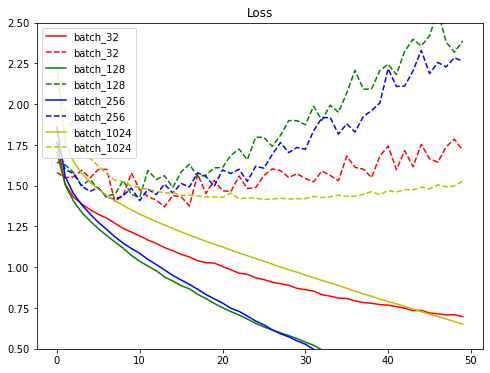

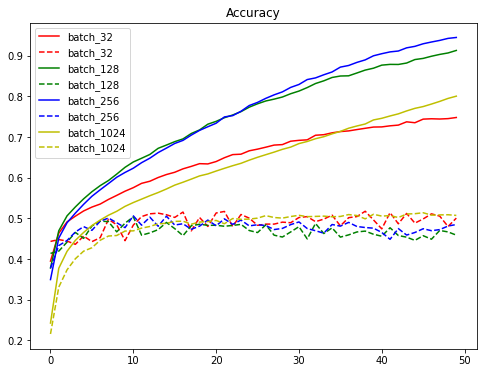

In [32]:
"""Code Here
將結果繪出
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_BNba.keys()):
    plt.plot(range(len(results_BNba[cond]['train-loss'])),results_BNba[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_BNba[cond]['valid-loss'])),results_BNba[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0.5, 2.5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_BNba.keys()):
    plt.plot(range(len(results_BNba[cond]['train-acc'])),results_BNba[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_BNba[cond]['valid-acc'])),results_BNba[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## BN after input

In [33]:
def build_mlp_BNai(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [35]:
results_BNai = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in BATCH_SIZE:
    model = build_mlp_BNai(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=i, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = f'batch_{str(i)}'
    results_BNai[exp_name_tag] = {'train-loss': train_loss,
                                  'valid-loss': valid_loss,
                                  'train-acc': train_acc,
                                  'valid-acc': valid_acc}

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
____________________________________________

Epoch 48/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.1977 - accuracy: 0.9309 - val_loss: 2.7181 - val_accuracy: 0.5360
Epoch 49/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.2004 - accuracy: 0.9296 - val_loss: 2.7751 - val_accuracy: 0.5365
Epoch 50/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.1916 - accuracy: 0.9326 - val_loss: 2.7422 - val_accuracy: 0.5348
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_

50000/50000 [==============================] - 5s 93us/step - loss: 0.0813 - accuracy: 0.9749 - val_loss: 2.9554 - val_accuracy: 0.5234
Epoch 46/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.0866 - accuracy: 0.9727 - val_loss: 3.0364 - val_accuracy: 0.5232
Epoch 47/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.0921 - accuracy: 0.9705 - val_loss: 3.0100 - val_accuracy: 0.5199
Epoch 48/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.0820 - accuracy: 0.9746 - val_loss: 3.1105 - val_accuracy: 0.5174
Epoch 49/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.0744 - accuracy: 0.9771 - val_loss: 3.1207 - val_accuracy: 0.5202
Epoch 50/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.0695 - accuracy: 0.9794 - val_loss: 3.1304 - val_accuracy: 0.5231
Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Sha

50000/50000 [==============================] - 2s 37us/step - loss: 0.1246 - accuracy: 0.9719 - val_loss: 2.4423 - val_accuracy: 0.5116
Epoch 43/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.1128 - accuracy: 0.9763 - val_loss: 2.4848 - val_accuracy: 0.5087
Epoch 44/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.1063 - accuracy: 0.9774 - val_loss: 2.5049 - val_accuracy: 0.5156
Epoch 45/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.0936 - accuracy: 0.9813 - val_loss: 2.5479 - val_accuracy: 0.5116
Epoch 46/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.0921 - accuracy: 0.9809 - val_loss: 2.6187 - val_accuracy: 0.5073
Epoch 47/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.0882 - accuracy: 0.9824 - val_loss: 2.6256 - val_accuracy: 0.5122
Epoch 48/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.0765 - accuracy: 0.9858 - val_loss: 2.6730

50000/50000 [==============================] - 2s 34us/step - loss: 0.9664 - accuracy: 0.6748 - val_loss: 1.3792 - val_accuracy: 0.5252
Epoch 40/50
50000/50000 [==============================] - 2s 34us/step - loss: 0.9519 - accuracy: 0.6810 - val_loss: 1.3826 - val_accuracy: 0.5247
Epoch 41/50
50000/50000 [==============================] - 2s 35us/step - loss: 0.9386 - accuracy: 0.6869 - val_loss: 1.3796 - val_accuracy: 0.5254
Epoch 42/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.9232 - accuracy: 0.6931 - val_loss: 1.3826 - val_accuracy: 0.5243
Epoch 43/50
50000/50000 [==============================] - 1s 30us/step - loss: 0.9087 - accuracy: 0.6971 - val_loss: 1.3848 - val_accuracy: 0.5266
Epoch 44/50
50000/50000 [==============================] - 2s 30us/step - loss: 0.8953 - accuracy: 0.7038 - val_loss: 1.3871 - val_accuracy: 0.5292
Epoch 45/50
50000/50000 [==============================] - 2s 31us/step - loss: 0.8806 - accuracy: 0.7079 - val_loss: 1.3864

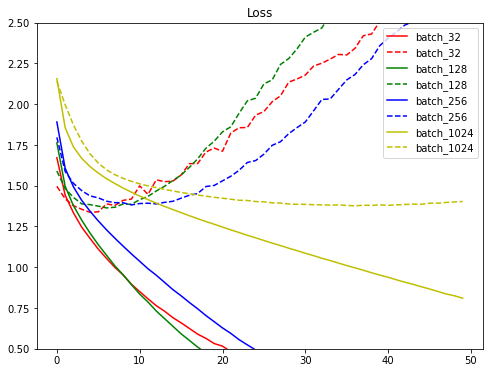

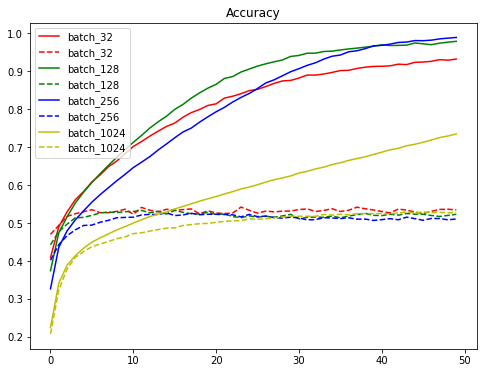

In [36]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_BNai.keys()):
    plt.plot(range(len(results_BNai[cond]['train-loss'])),results_BNai[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_BNai[cond]['valid-loss'])),results_BNai[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0.5, 2.5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_BNai.keys()):
    plt.plot(range(len(results_BNai[cond]['train-acc'])),results_BNai[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_BNai[cond]['valid-acc'])),results_BNai[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()